In [1]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis

#### Show image in output

In [2]:
def show_image(image, title, cmap=None):
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap=cmap, vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.show()

#### Show image in output and histogram of picture's pixel intensity

In [3]:
def draw_histogram(image, max_intensity=255):
    #print(image)
    flat_image = image.flatten() # flatten the matrix to 1D
    list_intensity = {x:0 for x in range(max_intensity+1)} # initialize dictionary
    valid_pixel_intensity = 0
    below_zero_intensity = 0
    over_max_intensity = 0
    for p in flat_image:
        if p < 0: # klipping
            below_zero_intensity += 1
            # list_intensity[0] = list_intensity[0] + 1
        elif p >= max_intensity:
            over_max_intensity += 1
            # list_intensity[max_intensity] = list_intensity[max_intensity] + 1
        else:
            list_intensity[p] = list_intensity[p] + 1
            valid_pixel_intensity += 1
    plt.bar(list_intensity.keys(), list_intensity.values(), width=1, color='gray')
    plt.show()
    print("Number of pixels with valid intensity: {}. All pixels: {}".format(valid_pixel_intensity, len(flat_image)))
    print("Number of pixels with negative intensity: {}\nNumber of pixels with intensity over max: {}".format(below_zero_intensity, over_max_intensity))

#### Calculate mean and standard deviation of image's pixel intensity

In [4]:
# Calculate mean value for of pixel intensities
def calculate_mean_std_dev(image):
    flat_image = image.flatten()
    n_pixel = len(flat_image)
    
    # mean
    image_sum=0
    for x in flat_image:
        image_sum += x
    m = image_sum/n_pixel
    
    # sigma
    sigma = 0
    for x in flat_image:
        sigma = sigma + (x - m)**2    
    sigma = 1/n_pixel * sigma
    
    return m, sigma

#### Linear transformation of image based on new meand and standard deviation values
Sigma explains the interval length between pixel intensities - for example: how spread are pixels on a scale from 0 to 255.

In [5]:
def linear_transformation(image, mean_t, sigma_t): # mean_t and sigma_t are new values for transformation
    mean, sigma = calculate_mean_std_dev(image)
    a = sigma_t**0.5/sigma**0.5
    b = mean_t - a * mean
    flat_image = image.flatten() # flatten the matrix to 1D
    new_image = np.array([round(a*x-b) for x in flat_image]).reshape(image.shape) # calculate new pixel intensities
    show_image(image=image, title="Original image\nmean: {}, sigma= {}".format(round(mean, 2), round(sigma, 2)), cmap="gray")
    draw_histogram(image=image)
    show_image(image=new_image, title="Linear transformation\nmean_t={}, sigma_t={}".format(mean_t, sigma_t), cmap="gray")
    draw_histogram(image=new_image)

#### Example: Histogram  and linear transformation of image Mona

In [6]:
image_path_mona = "data/mona.png"
image_mona = imread(image_path_mona, flatten=True)

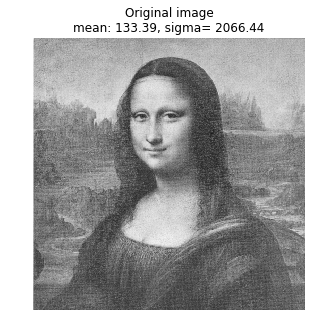

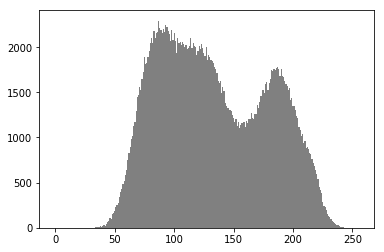

Number of pixels with valid intensity: 262144. All pixels: 262144
Number of pixels with negative intensity: 0
Number of pixels with intensity over max: 0


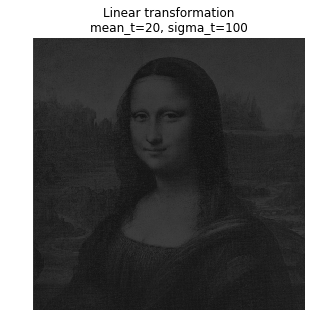

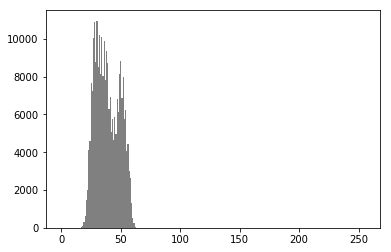

Number of pixels with valid intensity: 262144. All pixels: 262144
Number of pixels with negative intensity: 0
Number of pixels with intensity over max: 0


In [7]:
## high pixel intensity (bright)
# mean_t = 20
# sigma_t = 2500

## low pixel intensity (dark)
mean_t = 20
sigma_t = 100

linear_transformation(image=image_mona, mean_t=mean_t, sigma_t=sigma_t)